In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import xgboost as xgb
import seaborn as sns
import sklearn.metrics as metrics

In [2]:
df = pd.read_csv('train.csv')
df = df.set_index('DateTime')
df.index = pd.to_datetime(df.index)
df2 = pd.read_csv('test.csv')
df2 = df2.set_index('DateTime')
df2.index = pd.to_datetime(df2.index)

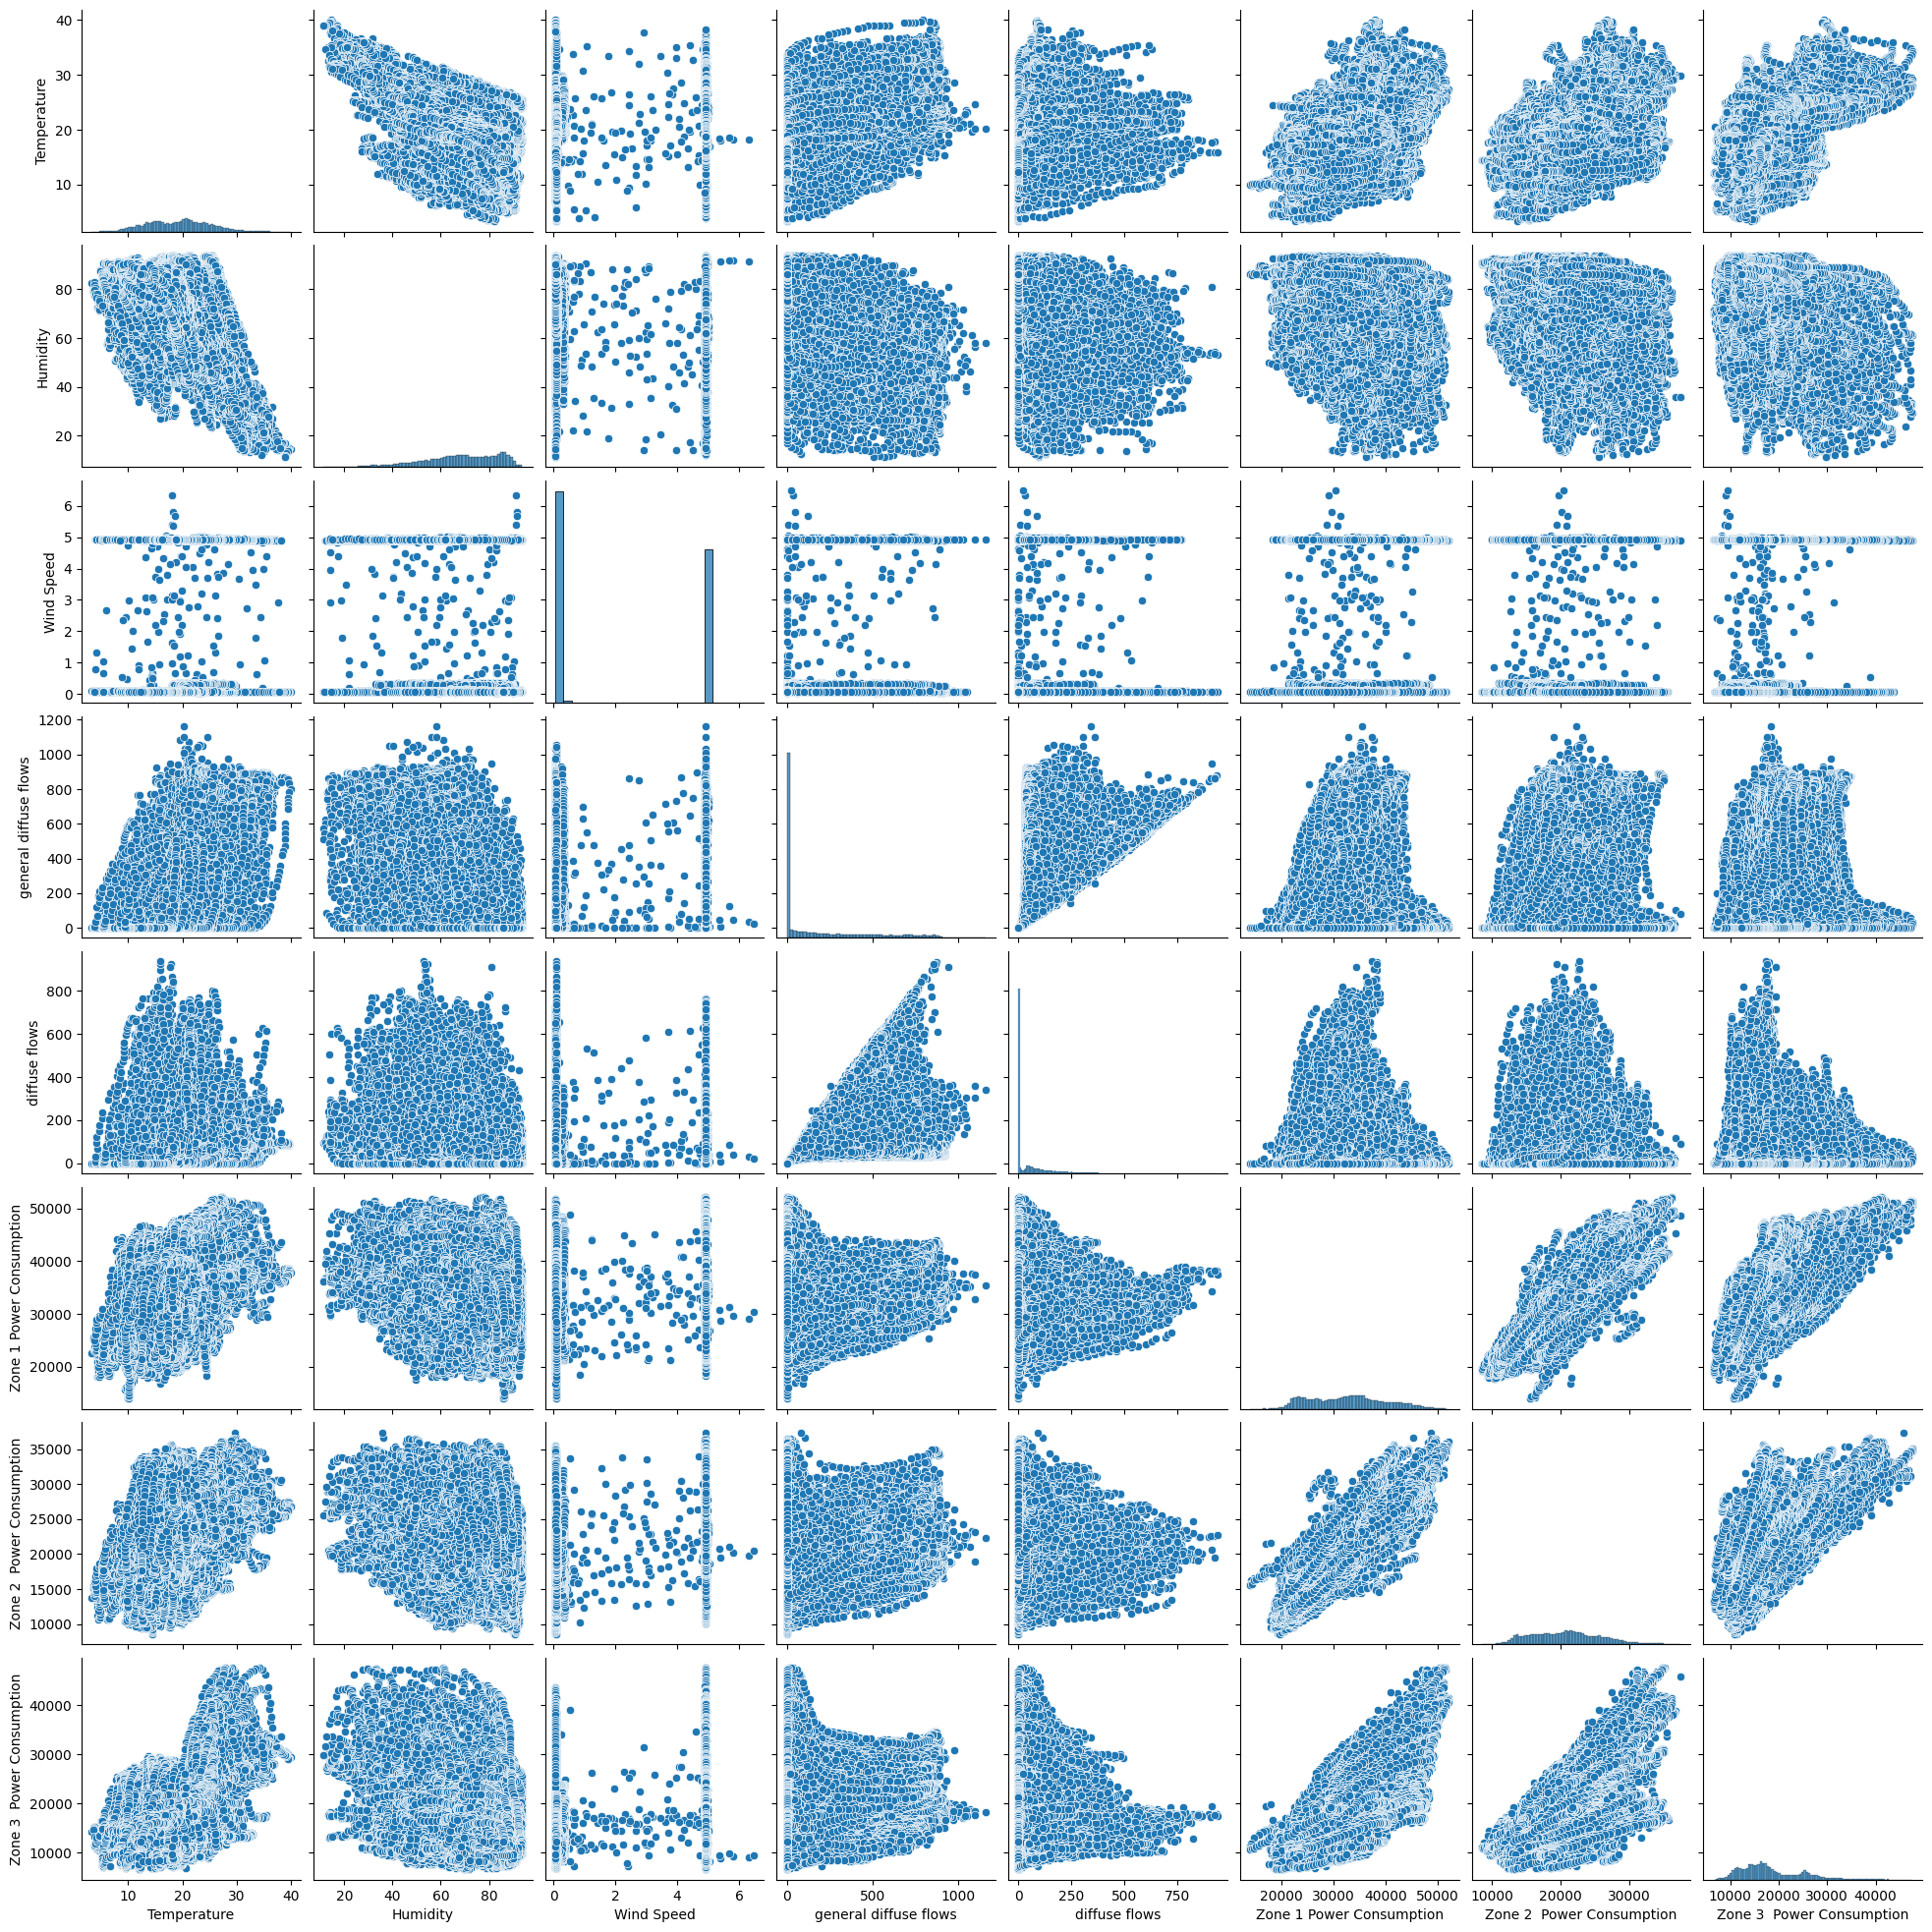

In [3]:
sns.pairplot(df)

In [4]:
df.corr().style.background_gradient(cmap='coolwarm')

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
Temperature,1.000000,-0.470212,0.452460,0.455748,0.171053,0.428273,0.463770,0.450373
Humidity,-0.470212,1.000000,-0.144759,-0.475260,-0.256578,-0.288253,-0.302412,-0.245601
Wind Speed,0.452460,-0.144759,1.000000,0.121331,-0.023313,0.148857,0.199002,0.232131
general diffuse flows,0.455748,-0.475260,0.121331,1.000000,0.559367,0.175696,0.174743,0.037994
diffuse flows,0.171053,-0.256578,-0.023313,0.559367,1.000000,0.065207,0.059576,-0.070075
Zone 1 Power Consumption,0.428273,-0.288253,0.148857,0.175696,0.065207,1.000000,0.867117,0.755161
Zone 2 Power Consumption,0.463770,-0.302412,0.199002,0.174743,0.059576,0.867117,1.000000,0.662086
Zone 3 Power Consumption,0.450373,-0.245601,0.232131,0.037994,-0.070075,0.755161,0.662086,1.000000


In [5]:
def datapreprocessing(dataframe):
    df = dataframe.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['dayofyear'] = df.index.dayofyear
    df['day'] = df.index.day
    return df

def remove_nan(dataframe):
    df = dataframe.copy()
    df['Wind Speed'] = df['Wind Speed'].interpolate('linear')
    me=df['Temperature'].dropna().mean()
    df['Temperature'].fillna(me, inplace=True)
    me=df['Humidity'].dropna().mean()
    df['Humidity'].fillna(me, inplace=True)
    me=df['general diffuse flows'].dropna().mean()
    df['general diffuse flows'].fillna(me, inplace=True)
    me=df['diffuse flows'].dropna().mean()
    df['diffuse flows'].fillna(me,inplace=True)
    return df

In [6]:
df = datapreprocessing(df)
df = remove_nan(df)
df2 = datapreprocessing(df2)

In [7]:
def mape(y_true, y_pred):
    m = (1- metrics.mean_absolute_percentage_error(y_true, y_pred))
    return 1-np.round(m,4)

In [9]:
df3 = pd.read_csv('sample_submisson.csv')

In [10]:
df3.columns

Index(['DateTime', 'Zone 1 Power Consumption', 'Zone 2  Power Consumption',
       'Zone 3  Power Consumption'],
      dtype='object')

In [11]:
res = []
mapes = []
for i in ['Zone 1 Power Consumption','Zone 2  Power Consumption','Zone 3  Power Consumption']:

    X_train = df[['Temperature', 'Humidity', 'hour','dayofweek', 'dayofyear', 'day']]
    y_train = df[i]

    X_test = df2[['Temperature', 'Humidity', 'hour','dayofweek', 'dayofyear', 'day']]

    model = xgb.XGBRegressor(base_score=0.6, booster='gbtree',    
                         n_estimators=1200,
                         max_depth=3,learning_rate=0.25, objective='reg:squarederror').fit(X_train, y_train)
    df3[i] = model.predict(X_test)


In [12]:
df3.to_csv('hidden_neuron_final.csv')